<a href="https://colab.research.google.com/github/Dreeck/ProyectosML/blob/Proyecto1/regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import pandas as pd
from collections import Counter
from google.colab import files
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


In [ ]:
df_red = pd.read_csv('winequality-red.csv', sep=';', low_memory=False)
df_white = pd.read_csv('winequality-white.csv', sep=';', low_memory=False)
df_red['wine_type'] = 'red'
df_white['wine_type'] = 'white'

In [ ]:
df = pd.concat([df_red, df_white], axis=0, ignore_index=True)
X = df.drop(columns=['quality', 'wine_type'])
y_regression = df['pH']  # Para regresión
y_classification = (df['quality'] >= 7).astype(int)  # Para clasificación binaria

In [ ]:
# Para clasificación multiclase
bins = [0, 4, 7, 10]
labels = ['low', 'medium', 'high']
y_classification_multi = pd.cut(df['quality'], bins=bins, labels=labels)

In [ ]:
# 3. División de los datos en conjunto de entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=42)

In [ ]:
# 4. Escalado de las variables numéricas
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)  # Escalado de entrenamiento
X_test_reg_scaled = scaler_reg.transform(X_test_reg)  # Escalado de prueba

[KNN] Validación cruzada (MSE promedio): 0.0020
[KNN] Error cuadrático medio (MSE) en el conjunto de prueba: 0.0020
[KNN] R2 en el conjunto de prueba: 0.9236


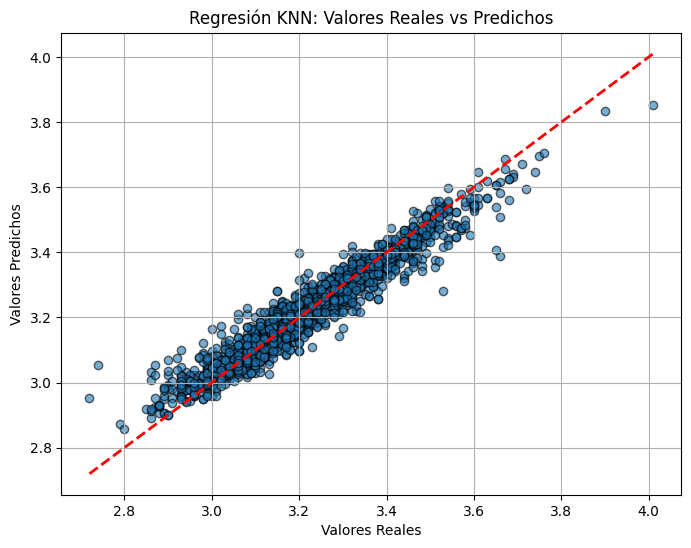

In [ ]:
# 5. Modelos de regresión (KNN y SVM)

# Regresión con KNN
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_cv_scores = cross_val_score(knn_regressor, X_train_reg_scaled, y_train_reg, cv=5, scoring='neg_mean_squared_error')

# Mostrar resultados de la validación cruzada
print(f"[KNN] Validación cruzada (MSE promedio): {-knn_cv_scores.mean():.4f}")

# 6. Entrenamiento de los modelos
knn_regressor.fit(X_train_reg_scaled, y_train_reg)

# 7. Predicciones y evaluación en el conjunto de prueba

# Predicciones con KNN
y_pred_knn = knn_regressor.predict(X_test_reg_scaled)
mse_knn = mean_squared_error(y_test_reg, y_pred_knn)
r2_knn = r2_score(y_test_reg, y_pred_knn)
print(f"[KNN] Error cuadrático medio (MSE) en el conjunto de prueba: {mse_knn:.4f}")
print(f"[KNN] R2 en el conjunto de prueba: {r2_knn:.4f}")


# 8. Correlación entre las variables predictoras y la variable objetivo
df_numerical = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_numerical.corr()

import matplotlib.pyplot as plt

# Gráfico de dispersión de valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_knn, alpha=0.6, edgecolors='k')
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión KNN: Valores Reales vs Predichos')
plt.grid(True)
plt.show()
4